<a href="https://colab.research.google.com/github/AmiraOsamaMohamed/OS2Project/blob/main/Copy_of_Copy_of_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 73 bytes


In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2


In [7]:
##read image folder##
DIR=r'/content/images'

In [8]:
##read train and test file##
train=pd.read_csv(r"/content/train.csv")
test=pd.read_csv(r"/content/test.csv")

In [9]:
##prepering data##
class_names=train.loc[:,'healthy':].columns
print(class_names)
number=0
train['label']=0
for i in class_names:
    train['label']=train['label'] + train[i] * number
    number=number+1
train.head()   

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


In [10]:
DIR

'/content/images'

In [11]:
natsort.natsorted(os.listdir(DIR))

['Test_0.jpg',
 'Test_1.jpg',
 'Test_2.jpg',
 'Test_3.jpg',
 'Test_4.jpg',
 'Test_5.jpg',
 'Test_6.jpg',
 'Test_7.jpg',
 'Test_8.jpg',
 'Test_9.jpg',
 'Test_10.jpg',
 'Test_11.jpg',
 'Test_12.jpg',
 'Test_13.jpg',
 'Test_14.jpg',
 'Test_15.jpg',
 'Test_16.jpg',
 'Test_17.jpg',
 'Test_18.jpg',
 'Test_19.jpg',
 'Test_20.jpg',
 'Test_21.jpg',
 'Test_22.jpg',
 'Test_23.jpg',
 'Test_24.jpg',
 'Test_25.jpg',
 'Test_26.jpg',
 'Test_27.jpg',
 'Test_28.jpg',
 'Test_29.jpg',
 'Test_30.jpg',
 'Test_31.jpg',
 'Test_32.jpg',
 'Test_33.jpg',
 'Test_34.jpg',
 'Test_35.jpg',
 'Test_36.jpg',
 'Test_37.jpg',
 'Test_38.jpg',
 'Test_39.jpg',
 'Test_40.jpg',
 'Test_41.jpg',
 'Test_42.jpg',
 'Test_43.jpg',
 'Test_44.jpg',
 'Test_45.jpg',
 'Test_46.jpg',
 'Test_47.jpg',
 'Test_48.jpg',
 'Test_49.jpg',
 'Test_50.jpg',
 'Test_51.jpg',
 'Test_52.jpg',
 'Test_53.jpg',
 'Test_54.jpg',
 'Test_55.jpg',
 'Test_56.jpg',
 'Test_57.jpg',
 'Test_58.jpg',
 'Test_59.jpg',
 'Test_60.jpg',
 'Test_61.jpg',
 'Test_62.jpg',
 '

In [12]:
def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label

In [13]:
def create_train_data():
    images=natsort.natsorted(os.listdir(DIR)) ##list of test picture##
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(DIR,img)
        
        if search("Train",img):
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path,r'/content/drive/MyDrive/healthy')
            
            elif(img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path,r'/content/drive/MyDrive/multiple_diseases')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path,r'/content/drive/MyDrive/rust')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(path,r'/content/drive/MyDrive/scab')
                
        elif search("Test",img):
            shutil.copy(path,r'/content/drive/MyDrive/test') ##images of test errrrrrrrror
# create_train_data()

In [24]:
# shutil.os.mkdir(r'/content/drive/MyDrive/train')
# shutil.os.mkdir(r'/content/drive/MyDrive/healthy')
# shutil.os.mkdir(r'/content/drive/MyDrive/multiple_diseases')
# shutil.os.mkdir(r'/content/drive/MyDrive/rust')
# shutil.os.mkdir(r'/content/drive/MyDrive/scab')

# shutil.os.mkdir(r'/content/drive/MyDrive/test')

In [14]:
train_dir=create_train_data()

100%|██████████| 3642/3642 [00:52<00:00, 69.55it/s]


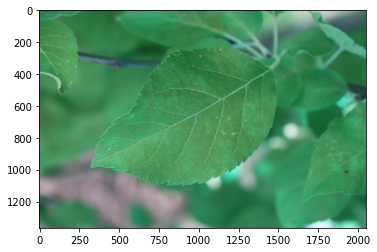

In [15]:
####data(images) preprocessing########
Train_DIR=r'/content/drive/MyDrive/'
Categories=['healthy','multiple_disease','rust','scab']
for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_image)
        plt.show()
        break
    break

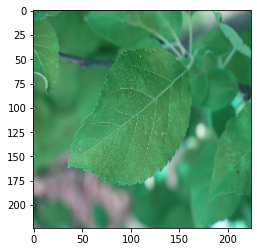

In [16]:
IMG_SIZE=224
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

In [17]:
####model prepation####
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D


In [18]:
datagen=ImageDataGenerator(rescale=1.0/255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)


train_datagen=datagen.flow_from_directory(r'/content/drive/MyDrive/train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='training')

val_datagen=datagen.flow_from_directory(r'/content/drive/MyDrive/train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='validation')
# print(type(train_datagen))
# print(type(val_datagen))
# print(type(datagen))
# print(train_datagen.image_shape)
# # print(val_datagen.samples//16)

Found 1459 images belonging to 4 classes.
Found 364 images belonging to 4 classes.


In [19]:

import numpy as np  
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout 
import os
from os import listdir
import matplotlib as plt
from matplotlib.image import imread
import tensorflow as tf
# # get the path or directory
# folder_dir = "/content/images"
# for images in os.listdir(folder_dir): 
#   if(images.startswith("Train_")):
#       print(images)
# #     img= imread(images.Path)
# # print(type(img))
#########Spliting Data############
# dataset = pd.read_csv('Churn_Modelling.csv')
# X = dataset.iloc[:, 3:-1].values
# y = dataset.iloc[:, -1].values
# datasetData=np.loadtxt('/content/images',delimiter=',')
# datasetLabel=np.loadtxt('/content/train.csv',delimiter=',')
# X_train=datasetData[:1000,:]
# Y_train=datasetLabel[:1000,1:]
# X_test=datasetData[1000:,:]
# Y_test=datasetLabel[1000:,1:]
# # from sklearn.model_selection import train_test_split
# # X_train, X_test, y_train, y_test = train_test_split(X_trainL, Y_trainL, test_size = 0.2, random_state = 0)
# ##########Plot Data#############
# plt.scatter(X_train[:,0], X_train[:,1], s=40,c=Y_train,cmap=plt.cm.Spectral)
# plt.show()
##############Build Neural network#############
# ann = tf.keras.Sequential()
# ##input##
# ann.add(tf.keras.layers.Dense(units=28*28, activation='relu'))
# ##hidden1##
# ann.add(tf.keras.layers.Dense(units=28*26, activation='relu'))
# ##hidden2##
# ann.add(tf.keras.layers.Dense(units=28*26, activation='relu'))
# ##output##
# ann.add(tf.keras.layers.Dense(units=4, activation='softmax'))
# ##compilation##
# ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
##checkpoint to save best parameter we reach it(less loss)###
# checkpoint = keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/weight",verbose=1,save_best_only=True)
# checkpoint=ModelCheckpoint(r'D:\Python37\Projects\Foliar diseases in apple trees\models\weight',
#                           monitor='val_loss',
#                           mode='min',
#                           save_best_only=True,
#                           verbose=1)
# earlystop=EarlyStopping(monitor='val_loss',
#                        min_delta=0,
#                        patience=10,
#                        verbose=1,
#                        restore_best_weights=True)

# callbacks=[checkpoint,earlystop]
# ##train model##
# history=ann.fit_generator( train_datagen, validation_data=val_datagen,
#                                  epochs=10,
#                                  steps_per_epoch=train_datagen.samples//16,
#                                  validation_steps=val_datagen.samples//16,
#                                  callbacks=callbacks)
#history=ann.fit(train_datagen , validation_data=val_datagen, epochs=10 , batch_size=32 , verbose=1 ,callbacks=[checkpoint])
# ann.summary()
 ##############################################, validation_split=0.2############
###########buliding model#############
# ann = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28, 28)),
#     tf.keras.layers.Dense(128, activation= 'relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(128, activation= 'relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])
# ann.summary()
############################################
ann = Sequential() 
ann.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
ann.add(MaxPooling2D(2,2))
ann.add(Conv2D(64,(3,3),activation='relu',padding='same'))
ann.add(MaxPooling2D(2,2))
ann.add(Conv2D(64,(3,3),activation='relu',padding='same'))
ann.add(MaxPooling2D(2,2))
ann.add(Conv2D(128,(3,3),activation='relu',padding='same'))
ann.add(MaxPooling2D(2,2))
ann.add(Flatten())
ann.add(Dense(4,activation='softmax'))













In [20]:
##################compiler model#####
# ann.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
ann.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
ann.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [21]:
checkpoint=ModelCheckpoint(r'/content/drive/MyDrive/weight',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]


     
history=ann.fit_generator(train_datagen,validation_data=val_datagen,
                                 epochs=30,
                                 steps_per_epoch=train_datagen.samples//16,
                                 validation_steps=val_datagen.samples//16,
                                 callbacks=callbacks)
                                

<ipython-input-21-a0cadc86d27f>:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=ann.fit_generator(train_datagen,validation_data=val_datagen,


Epoch 1/30
91/91 [==============================] - ETA: 0s - loss: 1.2782 - accuracy: 0.3070
Epoch 1: val_loss improved from inf to 1.23962, saving model to /content/drive/MyDrive/weight


91/91 [==============================] - 336s 4s/step - loss: 1.2782 - accuracy: 0.3070 - val_loss: 1.2396 - val_accuracy: 0.3438
Epoch 2/30
91/91 [==============================] - ETA: 0s - loss: 1.2526 - accuracy: 0.3319
Epoch 2: val_loss improved from 1.23962 to 1.23823, saving model to /content/drive/MyDrive/weight


91/91 [==============================] - 317s 3s/step - loss: 1.2526 - accuracy: 0.3319 - val_loss: 1.2382 - val_accuracy: 0.3381
Epoch 3/30
91/91 [==============================] - ETA: 0s - loss: 1.2295 - accuracy: 0.3818
Epoch 3: val_loss improved from 1.23823 to 1.06919, saving model to /content/drive/MyDrive/weight


91/91 [==============================] - 316s 3s/step - loss: 1.2295 - accuracy: 0.3818 - val_loss: 1.0692 - val_accuracy: 0.5625
Epoch 4/30
91/91 [==============================] - ETA: 0s - loss: 1.1394 - accuracy: 0.4449
Epoch 4: val_loss improved from 1.06919 to 0.99166, saving model to /content/drive/MyDrive/weight


91/91 [==============================] - 311s 3s/step - loss: 1.1394 - accuracy: 0.4449 - val_loss: 0.9917 - val_accuracy: 0.5909
Epoch 5/30
91/91 [==============================] - ETA: 0s - loss: 0.9263 - accuracy: 0.5911
Epoch 5: val_loss improved from 0.99166 to 0.78733, saving model to /content/drive/MyDrive/weight


91/91 [==============================] - 318s 3s/step - loss: 0.9263 - accuracy: 0.5911 - val_loss: 0.7873 - val_accuracy: 0.6534
Epoch 6/30
91/91 [==============================] - ETA: 0s - loss: 0.7773 - accuracy: 0.6417
Epoch 6: val_loss improved from 0.78733 to 0.70594, saving model to /content/drive/MyDrive/weight


91/91 [==============================] - 326s 4s/step - loss: 0.7773 - accuracy: 0.6417 - val_loss: 0.7059 - val_accuracy: 0.6705
Epoch 7/30
91/91 [==============================] - ETA: 0s - loss: 0.6905 - accuracy: 0.7013
Epoch 7: val_loss did not improve from 0.70594
91/91 [==============================] - 322s 4s/step - loss: 0.6905 - accuracy: 0.7013 - val_loss: 0.7092 - val_accuracy: 0.6648
Epoch 8/30
91/91 [==============================] - ETA: 0s - loss: 0.6556 - accuracy: 0.7380
Epoch 8: val_loss improved from 0.70594 to 0.60476, saving model to /content/drive/MyDrive/weight


91/91 [==============================] - 317s 3s/step - loss: 0.6556 - accuracy: 0.7380 - val_loss: 0.6048 - val_accuracy: 0.7443
Epoch 9/30
91/91 [==============================] - ETA: 0s - loss: 0.6278 - accuracy: 0.7533
Epoch 9: val_loss improved from 0.60476 to 0.59808, saving model to /content/drive/MyDrive/weight


91/91 [==============================] - 317s 3s/step - loss: 0.6278 - accuracy: 0.7533 - val_loss: 0.5981 - val_accuracy: 0.7585
Epoch 10/30
91/91 [==============================] - ETA: 0s - loss: 0.6125 - accuracy: 0.7651
Epoch 10: val_loss improved from 0.59808 to 0.57594, saving model to /content/drive/MyDrive/weight


91/91 [==============================] - 317s 3s/step - loss: 0.6125 - accuracy: 0.7651 - val_loss: 0.5759 - val_accuracy: 0.7727
Epoch 11/30
91/91 [==============================] - ETA: 0s - loss: 0.5787 - accuracy: 0.7699
Epoch 11: val_loss improved from 0.57594 to 0.51846, saving model to /content/drive/MyDrive/weight


91/91 [==============================] - 317s 3s/step - loss: 0.5787 - accuracy: 0.7699 - val_loss: 0.5185 - val_accuracy: 0.7841
Epoch 12/30
91/91 [==============================] - ETA: 0s - loss: 0.5408 - accuracy: 0.7976
Epoch 12: val_loss improved from 0.51846 to 0.47812, saving model to /content/drive/MyDrive/weight


91/91 [==============================] - 316s 3s/step - loss: 0.5408 - accuracy: 0.7976 - val_loss: 0.4781 - val_accuracy: 0.8381
Epoch 13/30
91/91 [==============================] - ETA: 0s - loss: 0.4951 - accuracy: 0.8122
Epoch 13: val_loss improved from 0.47812 to 0.46553, saving model to /content/drive/MyDrive/weight


91/91 [==============================] - 311s 3s/step - loss: 0.4951 - accuracy: 0.8122 - val_loss: 0.4655 - val_accuracy: 0.8153
Epoch 14/30
91/91 [==============================] - ETA: 0s - loss: 0.4154 - accuracy: 0.8517
Epoch 14: val_loss improved from 0.46553 to 0.33286, saving model to /content/drive/MyDrive/weight


91/91 [==============================] - 313s 3s/step - loss: 0.4154 - accuracy: 0.8517 - val_loss: 0.3329 - val_accuracy: 0.8892
Epoch 15/30
91/91 [==============================] - ETA: 0s - loss: 0.3958 - accuracy: 0.8635
Epoch 15: val_loss did not improve from 0.33286
91/91 [==============================] - 311s 3s/step - loss: 0.3958 - accuracy: 0.8635 - val_loss: 0.4289 - val_accuracy: 0.8608
Epoch 16/30
91/91 [==============================] - ETA: 0s - loss: 0.4418 - accuracy: 0.8420
Epoch 16: val_loss did not improve from 0.33286
91/91 [==============================] - 311s 3s/step - loss: 0.4418 - accuracy: 0.8420 - val_loss: 0.3846 - val_accuracy: 0.8722
Epoch 17/30
91/91 [==============================] - ETA: 0s - loss: 0.3679 - accuracy: 0.8725
Epoch 17: val_loss did not improve from 0.33286
91/91 [==============================] - 310s 3s/step - loss: 0.3679 - accuracy: 0.8725 - val_loss: 0.3860 - val_accuracy: 0.8835
Epoch 18/30
91/91 [==============================] 

91/91 [==============================] - 311s 3s/step - loss: 0.3097 - accuracy: 0.8967 - val_loss: 0.2940 - val_accuracy: 0.8864
Epoch 20/30
91/91 [==============================] - ETA: 0s - loss: 0.3064 - accuracy: 0.9030
Epoch 20: val_loss did not improve from 0.29396
91/91 [==============================] - 311s 3s/step - loss: 0.3064 - accuracy: 0.9030 - val_loss: 0.4102 - val_accuracy: 0.8466
Epoch 21/30
91/91 [==============================] - ETA: 0s - loss: 0.2896 - accuracy: 0.8995
Epoch 21: val_loss improved from 0.29396 to 0.29142, saving model to /content/drive/MyDrive/weight


91/91 [==============================] - 311s 3s/step - loss: 0.2896 - accuracy: 0.8995 - val_loss: 0.2914 - val_accuracy: 0.9148
Epoch 22/30
91/91 [==============================] - ETA: 0s - loss: 0.2802 - accuracy: 0.9099
Epoch 22: val_loss improved from 0.29142 to 0.27747, saving model to /content/drive/MyDrive/weight


91/91 [==============================] - 312s 3s/step - loss: 0.2802 - accuracy: 0.9099 - val_loss: 0.2775 - val_accuracy: 0.9034
Epoch 23/30
91/91 [==============================] - ETA: 0s - loss: 0.2815 - accuracy: 0.9120
Epoch 23: val_loss improved from 0.27747 to 0.27009, saving model to /content/drive/MyDrive/weight


91/91 [==============================] - 316s 3s/step - loss: 0.2815 - accuracy: 0.9120 - val_loss: 0.2701 - val_accuracy: 0.8920
Epoch 24/30
91/91 [==============================] - ETA: 0s - loss: 0.2488 - accuracy: 0.9168
Epoch 24: val_loss improved from 0.27009 to 0.25588, saving model to /content/drive/MyDrive/weight


91/91 [==============================] - 315s 3s/step - loss: 0.2488 - accuracy: 0.9168 - val_loss: 0.2559 - val_accuracy: 0.9205
Epoch 25/30
91/91 [==============================] - ETA: 0s - loss: 0.2434 - accuracy: 0.9106
Epoch 25: val_loss did not improve from 0.25588
91/91 [==============================] - 311s 3s/step - loss: 0.2434 - accuracy: 0.9106 - val_loss: 0.2616 - val_accuracy: 0.9091
Epoch 26/30
91/91 [==============================] - ETA: 0s - loss: 0.2601 - accuracy: 0.9085
Epoch 26: val_loss did not improve from 0.25588
91/91 [==============================] - 313s 3s/step - loss: 0.2601 - accuracy: 0.9085 - val_loss: 0.2722 - val_accuracy: 0.8949
Epoch 27/30
91/91 [==============================] - ETA: 0s - loss: 0.2288 - accuracy: 0.9217
Epoch 27: val_loss did not improve from 0.25588
91/91 [==============================] - 311s 3s/step - loss: 0.2288 - accuracy: 0.9217 - val_loss: 0.3092 - val_accuracy: 0.9006
Epoch 28/30
91/91 [==============================] 

91/91 [==============================] - 313s 3s/step - loss: 0.2113 - accuracy: 0.9258 - val_loss: 0.2483 - val_accuracy: 0.9119
Epoch 30/30
91/91 [==============================] - ETA: 0s - loss: 0.1944 - accuracy: 0.9356
Epoch 30: val_loss improved from 0.24830 to 0.24768, saving model to /content/drive/MyDrive/weight


91/91 [==============================] - 315s 3s/step - loss: 0.1944 - accuracy: 0.9356 - val_loss: 0.2477 - val_accuracy: 0.9261


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


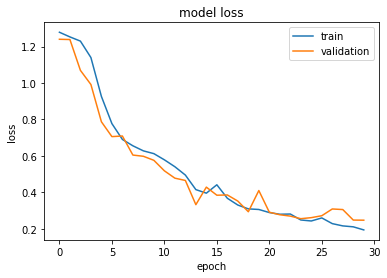

In [22]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


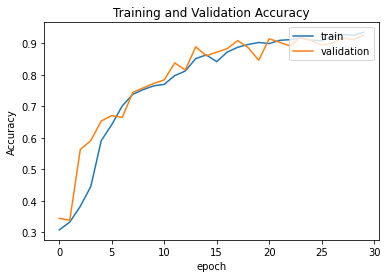

In [23]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()

1/1 [==============================] - 0s 64ms/step
0


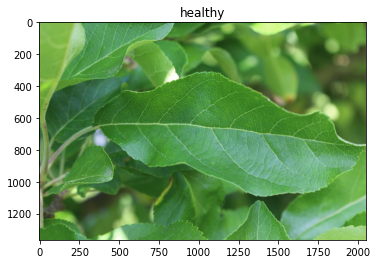

In [31]:
##predict##
test_image=r'/content/drive/MyDrive/test/Test_1026.jpg'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=ann.predict(test_image)
print(np.argmax(result))
Categories=['healthy','multiple_disease','rust','scab']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()

In [ ]:
# from PIL import Image
# from numpy import asarray
# # load the image and convert into
# # numpy array
# img = Image.open('/content/images')
# for i in img:
#  numpydata = asarray(i)
# # data
# print(numpydata)
##########################################################################
# from PIL import Image
# import glob
# image_list = []
# for filename in glob.glob('/content/images'): #assuming gif
#     im=Image.open(filename)
#     image_list.append(im)
########################################
# import cv2
# import os
# folder='/content/images'
# images = []
# for filename in os.listdir(folder):
#     img = cv2.imread(os.path.join(folder,filename))
#     images.append(img)
# print(images) 
#####################3
# import pandas as pd
# import os
# from os import listdir
# import cv2
# df=pd.read_csv('/content/train.csv')
# print(df)
# # folder_dir = "/content/images"
# # img=[]
# # for images in os.listdir(folder_dir): 
# #      if(images.startswith("Train_")):
# #          img.append(images)
# # print(img)
# from PIL import Image
# import glob
# image_list = []
# path=glob.glob('/content/images')
# for filename in path: #assuming gif
#     # if(filename.startswith("/content/images/Train_")):
#        im=cv2.imread(filename)
#        print(im)
#        image_list.append(im)
# print(image_list)      
# from numpy import *   
# for i in image_list:
#   numpydata = asarray(i)
  

# print(image_list)


In [ ]:
# import cv2
# import glob
# from skimage.filters import gaussian
# from skimage import img_as_ubyte

# #select the path
# path = "/content/images"
# img_number = 1  #Start an iterator for image number.
# #This number can be later added to output image file names.

# for file in glob.glob(path):
#     print(file)     #just stop here to see all file names printed
#     img= cv2.imread(file, 0)  #now, we can read each file since we have the full path
    
# #process each image - change color from BGR to RGB.
#     smoothed_image = img_as_ubyte(gaussian(img, sigma=5, mode='constant', cval=0.0)) 
    
#     cv2.imwrite("/content/Simages"+str(img_number)+".jpg", smoothed_image)
#     img_number +=1   

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing import image_dataset_from_directory

# image_size = (224, 224)
# batch_size = 32

# train_ds = image_dataset_from_directory(
#     "/content/images",
#     # labels = "inferred",
#     # label_mode = 'int',
#     validation_split=0.2,
#     subset="training",
#     seed=1337,
#     image_size=image_size,
#     batch_size=batch_size,
# )
# val_ds =image_dataset_from_directory(
#     "/content/images",
#     # labels = "inferred",
#     # label_mode = 'int',
#     validation_split=0.2,
#     subset="validation",
#     seed=1337,
#     image_size=image_size,
#     batch_size=batch_size,
# )
# test_ds = image_dataset_from_directory(
#     "/content/images",
#     # labels = "inferred",
#     # label_mode = 'int',
#     seed=1337,
#     image_size=image_size,
#     batch_size=batch_size,
# )
# from matplotlib.image import imread
# import cv2
# img=imread("/content/images/Test_0.jpg")
# print(img)

In [ ]:
# import keras
# import tensorflow
# from keras.models import Sequential
# from keras.layers import Dense,Dropout
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# # from tensorflow.keras import dataset, layers ,models
# dataset =np.loadtext
# #split data to training and testing
# # data= dataset[]

In [9]:
!kaggle competitions download -c plant-pathology-2020-fgvc7
from zipfile import ZipFile
file_name = "/content/plant-pathology-2020-fgvc7.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

plant-pathology-2020-fgvc7.zip: Skipping, found more recently modified local copy (use --force to force download)
Done


In [ ]:
# ######evaluate##
# print(ann.evaluate(X_test,Y_test))
# print(ann.metrics_names)

In [ ]:
# ##save model##
# ann.save('/content/drive/MyDrive/model.csv')
# c=load_model('/content/drive/MyDrive/model.csv')
# c.load_weights('/content/drive/MyDrive/weight.csv')

In [ ]:
# ##predict##
# print(ann.predict(X_test),Y_test)
# print(Y_test)